In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

df = pd.DataFrame({'song':[]})
for path in sorted(glob.glob(os.path.join('ex1', "*")), key=lambda a : int(a[-2:])):
    for filename in glob.glob(os.path.join(path, "*.csv")):
        with open(filename, 'r', encoding='utf-8') as file:
            tmp = pd.read_csv(file)
            tmp.rename(columns={'count': str(os.path.split(path)[1])}, inplace = True)
            df = pd.merge(df, tmp, on='song', how='right')
tmp = pd.read_csv('ex1.csv')
df = pd.merge(df, tmp, on='song', how='right')
df = df.rename(columns = {'count':'Total'})
df.sort_values('Total', axis=0, ascending=False)

,song,01,02,03,04,05,06,07,08,09,...,22,23,24,25,26,27,28,29,30,Total
0,You're The One,51.0,71.0,53.0,72.0,68.0,33.0,25.0,56.0,80.0,...,63.0,51.0,61.0,63.0,62.0,32.0,42.0,51.0,70.0,6444
1,Undo,56.0,61.0,61.0,71.0,41.0,22.0,36.0,39.0,63.0,...,54.0,59.0,73.0,59.0,52.0,32.0,29.0,65.0,67.0,5759
2,Revelry,31.0,56.0,44.0,37.0,34.0,31.0,25.0,32.0,52.0,...,50.0,25.0,55.0,48.0,50.0,23.0,28.0,49.0,53.0,4510
3,Sehr kosmisch,26.0,50.0,36.0,27.0,42.0,18.0,17.0,31.0,26.0,...,43.0,40.0,40.0,40.0,33.0,23.0,22.0,29.0,36.0,3764
4,Horn Concerto No. 4 in E flat K495: II. Romanc...,25.0,25.0,34.0,28.0,36.0,22.0,17.0,27.0,32.0,...,37.0,34.0,33.0,34.0,30.0,26.0,19.0,44.0,32.0,3362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93656,Larmes De MÃÂ©tal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
93657,Twisted Little Sister,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
93658,Hollyhood to Hollywood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
93659,Pilling Me (feat. Claudia Kennaugh),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [21]:
df[:5]

,song,01,02,03,04,05,06,07,08,09,...,22,23,24,25,26,27,28,29,30,Total
0,You're The One,51.0,71.0,53.0,72.0,68.0,33.0,25.0,56.0,80.0,...,63.0,51.0,61.0,63.0,62.0,32.0,42.0,51.0,70.0,6444
1,Undo,56.0,61.0,61.0,71.0,41.0,22.0,36.0,39.0,63.0,...,54.0,59.0,73.0,59.0,52.0,32.0,29.0,65.0,67.0,5759
2,Revelry,31.0,56.0,44.0,37.0,34.0,31.0,25.0,32.0,52.0,...,50.0,25.0,55.0,48.0,50.0,23.0,28.0,49.0,53.0,4510
3,Sehr kosmisch,26.0,50.0,36.0,27.0,42.0,18.0,17.0,31.0,26.0,...,43.0,40.0,40.0,40.0,33.0,23.0,22.0,29.0,36.0,3764
4,Horn Concerto No. 4 in E flat K495: II. Romanc...,25.0,25.0,34.0,28.0,36.0,22.0,17.0,27.0,32.0,...,37.0,34.0,33.0,34.0,30.0,26.0,19.0,44.0,32.0,3362


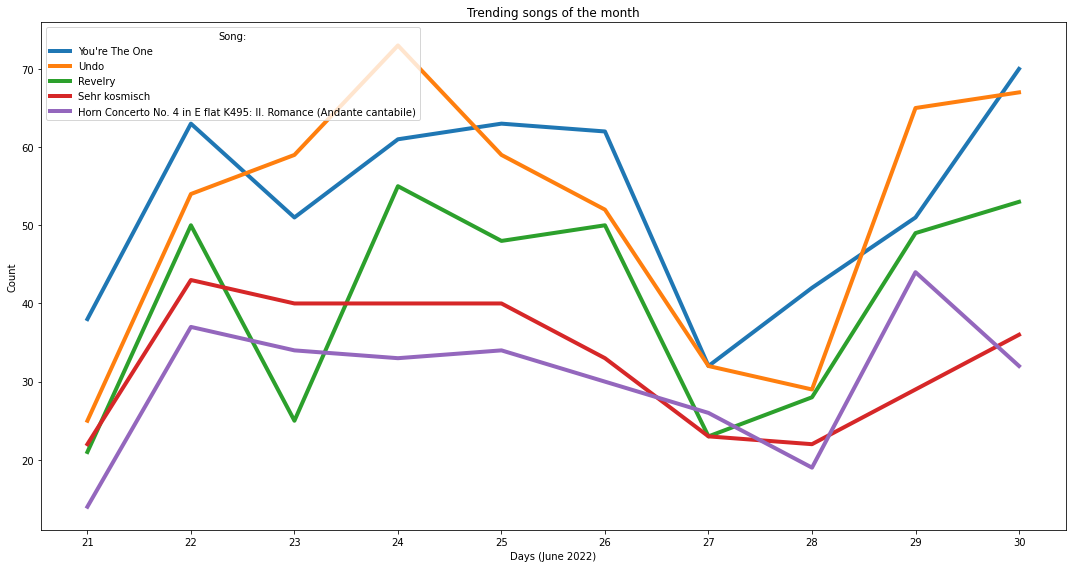

In [22]:
plt.figure(figsize=(15, 8), tight_layout=True)
plt.plot(df[:5].drop(['song', 'Total'], axis=1).T[-10:], linewidth=4)
plt.xlabel('Days (June 2022)')
plt.ylabel('Count')
plt.title('Trending songs of the month')
plt.legend(title='Song:', title_fontsize = 10, labels=df[:5].song)
plt.show()

In [23]:
dfu = pd.DataFrame({'userId':[]})
for path in sorted(glob.glob(os.path.join('ex2', "*")), key=lambda a : int(a[-2:])):
    for filename in glob.glob(os.path.join(path, "*.csv")):
        with open(filename, 'r', encoding='utf-8') as file:
            tmp = pd.read_csv(file)
            tmp.rename(columns={'count': str(os.path.split(path)[1])}, inplace = True)
            dfu = pd.merge(dfu, tmp, on='userId', how='right')
# tmp = pd.read_csv('ex2.csv')
# dfu = pd.merge(dfu, tmp, on='userId', how='right')
# dfu = dfu.rename(columns = {'count':'Total'})
dfu['Total'] = dfu.sum(axis=1)
dfu.sort_values('Total', axis=0, ascending=False)
dfu[:10]

,userId,01,02,03,04,05,06,07,08,09,...,22,23,24,25,26,27,28,29,30,Total
0,3736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,100.0,212,4116.0
1,3899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.0,90.0,207,4295.0
2,3195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,30.0,168,3398.0
3,2599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164,2763.0
4,2366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157,2523.0
5,3591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148,3739.0
6,1489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142,1631.0
7,770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,7.0,35.0,29.0,16.0,24.0,13.0,12.0,141,1062.0
8,4947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,14.0,141,5108.0
9,4155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129,4284.0


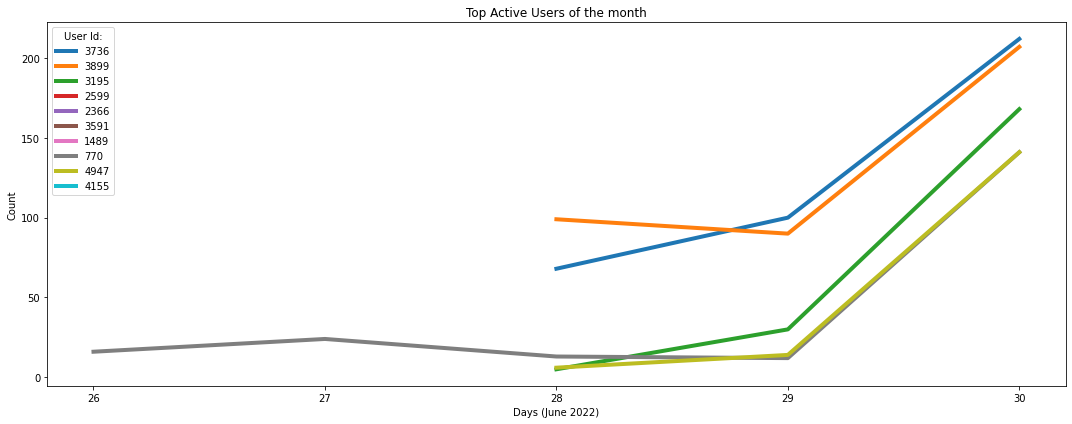

In [24]:
plt.figure(figsize=(15, 6), tight_layout=True)
plt.plot(dfu[:10].drop(['userId', 'Total'], axis=1).T[-5:], linewidth=4)
plt.xlabel('Days (June 2022)')
plt.ylabel('Count')
plt.title('Top Active Users of the month')
plt.legend(title='User Id:', title_fontsize = 10, labels=dfu[:10].userId)
plt.show()

In [25]:
dfc = pd.DataFrame({'city':[]})
for path in sorted(glob.glob(os.path.join('ex3', "*")), key=lambda a : int(a[-2:])):
    for filename in glob.glob(os.path.join(path, "*.csv")):
        with open(filename, 'r', encoding='utf-8') as file:
            tmp = pd.read_csv(file)
            tmp.rename(columns={'count': str(os.path.split(path)[1])}, inplace = True)
            dfc = pd.merge(dfc, tmp, on='city', how='right')
# tmp = pd.read_csv('ex3.csv')
# dfc = pd.merge(dfc, tmp, on='city', how='right')
# dfc = dfc.rename(columns = {'count':'Total'})
dfc['Total'] = dfc.sum(axis=1)
dfc.sort_values('Total', axis=0, ascending=False)
dfc[:10]

/tmp/ipykernel_3569/2989480890.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfc['Total'] = dfc.sum(axis=1)


,city,01,02,03,04,05,06,07,08,09,...,22,23,24,25,26,27,28,29,30,Total
0,CA,1969.0,1884.0,2060.0,2125.0,1780.0,1032.0,1304.0,2392.0,2027.0,...,2421.0,2219.0,2939.0,2315.0,2082.0,1520.0,1946.0,2243.0,2999,62006.0
1,NY-NJ-PA,1175.0,1072.0,665.0,979.0,1123.0,636.0,515.0,942.0,1058.0,...,1328.0,918.0,1064.0,1234.0,854.0,663.0,771.0,1223.0,1501,28127.0
2,TX,1340.0,1059.0,878.0,1168.0,1204.0,807.0,343.0,879.0,1400.0,...,1029.0,750.0,1210.0,1217.0,1153.0,770.0,646.0,1335.0,1105,29496.0
3,FL,491.0,763.0,847.0,496.0,442.0,305.0,202.0,555.0,682.0,...,572.0,776.0,842.0,611.0,754.0,332.0,642.0,646.0,956,18719.0
4,GA,297.0,310.0,235.0,457.0,355.0,248.0,130.0,245.0,229.0,...,686.0,436.0,538.0,491.0,221.0,230.0,326.0,366.0,745,12378.0
5,NaN,475.0,569.0,550.0,509.0,533.0,265.0,271.0,512.0,570.0,...,586.0,550.0,591.0,671.0,576.0,302.0,351.0,625.0,593,14728.0
6,PA,341.0,485.0,668.0,680.0,364.0,228.0,316.0,630.0,471.0,...,402.0,347.0,906.0,308.0,404.0,292.0,229.0,316.0,520,13431.0
7,MI,482.0,358.0,355.0,616.0,299.0,330.0,268.0,533.0,670.0,...,633.0,460.0,652.0,676.0,782.0,472.0,202.0,367.0,467,13924.0
8,DC-VA-MD-WV,307.0,215.0,226.0,250.0,308.0,135.0,88.0,391.0,250.0,...,284.0,140.0,216.0,313.0,211.0,143.0,108.0,248.0,430,7531.0
9,NC,405.0,265.0,244.0,331.0,173.0,198.0,278.0,442.0,358.0,...,585.0,284.0,229.0,322.0,537.0,154.0,242.0,498.0,381,10639.0


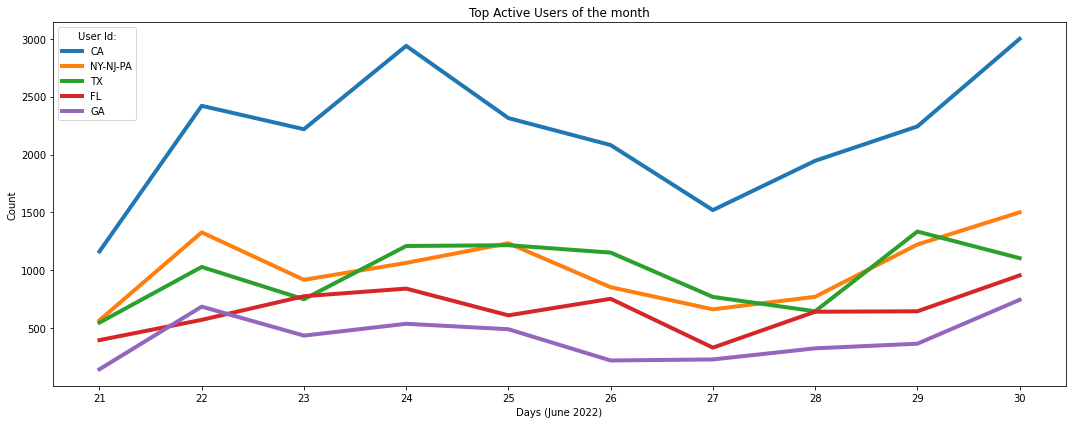

In [26]:
plt.figure(figsize=(15, 6), tight_layout=True)
plt.plot(dfc[:5].drop(['city', 'Total'], axis=1).T[-10:], linewidth=4)
plt.xlabel('Days (June 2022)')
plt.ylabel('Count')
plt.title('Top Active Users of the month')
plt.legend(title='User Id:', title_fontsize = 10, labels=dfc[:5].city)
plt.show()

<AxesSubplot:>

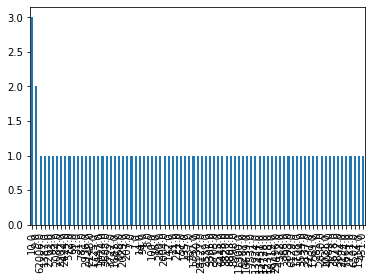

In [27]:
dfc['Total'].value_counts().plot(kind='bar')

In [43]:
#tmp = df.transpose()
df.drop(['Total'], axis=1).T[:10]


,0,1,2,3,4,5,6,7,8,9,...,124617,124618,124619,124620,124621,124622,124623,124624,124625,124626
song,You're The One,Undo,Revelry,Sehr kosmisch,Horn Concerto No. 4 in E flat K495: II. Romanc...,Dog Days Are Over (Radio Edit),Use Somebody,Secrets,Canada,Invalid,...,Fireday,When The Stars Begin to Fall,Chaplin's Studio Opening,Capeside Rock,Vista,Summer Wind,The Blackest Day,Columbus Stockade (LP Version),My Little One,Noche De Sexo
01,51.0,56.0,31.0,26.0,25.0,17.0,13.0,23.0,27.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02,71.0,61.0,56.0,50.0,25.0,26.0,28.0,22.0,14.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03,53.0,61.0,44.0,36.0,34.0,26.0,22.0,20.0,21.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04,72.0,71.0,37.0,27.0,28.0,41.0,24.0,31.0,23.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05,68.0,41.0,34.0,42.0,36.0,35.0,29.0,22.0,30.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06,33.0,22.0,31.0,18.0,22.0,10.0,10.0,13.0,13.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07,25.0,36.0,25.0,17.0,17.0,19.0,17.0,12.0,18.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08,56.0,39.0,32.0,31.0,27.0,36.0,21.0,21.0,24.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09,80.0,63.0,52.0,26.0,32.0,39.0,17.0,31.0,18.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
